#### DATA SCIENTIST: NATURAL LANGUAGE PROCESSING SPECIALIST

# Exploring Student Data

Imagine that you work for a school district and have collected some data on local students and their parents. You've been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students' parents do for work?
- How often are students absent from school?

In this project, you'll explore and summarize some student data in order to answer these questions.

## Data citation:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. http://archive.ics.uci.edu/ml/datasets/Student+Performance

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez


### Initial exploration

1. The provided dataframe (saved as students) includes the following variables/features:

   - **address**: the location of the student's home ('U' for urban and 'R' for rural)
   - **absences**: the number of times the student was absent during the school year
   - **Mjob**: the student's mother's job industry
   - **Fjob**: the student's father's job industry
   - **math_grade**: the student's final grade in math, ranging from 0 to 20

   Use the pandas `.head()` method to inspect the first few rows of data.

   Print the first five rows using `print(students.head())`.


In [11]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv("../data/students.csv")

# Print first few rows of data
print(df.head())

  address  absences     Mjob      Fjob  math_grade
0       U         6  at_home   teacher           6
1       U         4  at_home     other           6
2       U        10  at_home     other          10
3       U         2   health  services          15
4       U         4    other     other          10


2. Use the pandas `.describe()` method to print out summary statistics for all five features in the dataset.
   - Inspect the output. 
   - Do more students live in urban or rural locations?

    Make sure to use `include = 'all'` to include all of the columns in the dataset.


In [12]:
# Print summary statistics for all columns
print(df.describe(include="all"))

       address    absences   Mjob   Fjob  math_grade
count      395  395.000000    395    395  395.000000
unique       2         NaN      5      5         NaN
top          U         NaN  other  other         NaN
freq       307         NaN    141    217         NaN
mean       NaN    5.708861    NaN    NaN   10.415190
std        NaN    8.003096    NaN    NaN    4.581443
min        NaN    0.000000    NaN    NaN    0.000000
25%        NaN    0.000000    NaN    NaN    8.000000
50%        NaN    4.000000    NaN    NaN   11.000000
75%        NaN    8.000000    NaN    NaN   14.000000
max        NaN   75.000000    NaN    NaN   20.000000


### Summarize a typical student grade

3. Let's start by trying to summarize the `math_grade` column. Calculate and print the mean value of `math_grade`.

    Use the pandas method `.mean()`.


In [13]:
# Calculate mean
print("mean math grade: ", df.math_grade.mean())

mean math grade:  10.415189873417722


4. Next, calculate and print the median value of `math_grade`.
   - Compare this value to the mean.
   - Is it smaller?
   - larger?
    
    Use the pandas method `.median()`.


In [14]:
# Calculate median
print("median math grade: ", df.math_grade.median())

median math grade:  11.0


5. Finally, calculate and print the mode of the math_grade column.
   - What is the most common grade earned by students in this dataset?
   - How different is this number from the mean and median?

    Use the pandas method `.mode()`.

    **Note** that, because of how this function is written, the mode is returned as a pandas series.
             In order to convert it to a single value, we can extract the first value in the series (eg., `students.math_grade.mode()[0]`)


In [15]:
# Calculate mode
print("mode of math grades: ", df.math_grade.mode()[0])

mode of math grades:  10


### Summarize the spread of student grades

6. Next, let's summarize the spread of student grades. Calculate and print the range of the math_grade column.

    Subtract the minimum student grade from the maximum student grade to get the range, using the pandas methods .max() and .min().


In [16]:
# Calculate range
print("range of math grades: ", df.math_grade.max() - df.math_grade.min())

range of math grades:  20


7. Calculate and print the standard deviation of the math_grade column. About two thirds of values fall within one standard deviation of the mean. What does this number tell you about how much math grades vary? \

   Use the pandas method `.std()` to calculate the standard deviation. \

   The standard deviation is about 4.6, while the average grade is about 10.4. This means that about two thirds of students are earning a grade between 5.8 (calculated as 10.4 - 4.6) and 15 (calculated as 10.4 + 4.6).


In [17]:
# Calculate standard deviation
print("SD of math grades: ", df.math_grade.std())

SD of math grades:  4.5814426109978434


8. Finally, calculate the mean absolute deviation of the `math_grade` column. This is the mean difference between each students's score and the average score.

    Use the pandas method `.mad()`.


In [19]:
# Calculate MAD
mad = abs(df.math_grade - df.math_grade.mean()).mean()
print(f"MAD of math grades: {mad}")


MAD of math grades: 3.4289889440794745


### Visualize the distribution of student grades

9. Now that we've summarized student grades using statistics for central tendency and spread, let's visualize the distribution using a histogram. Use the seaborn histplot() function to create a histogram of math_grade.

    Note that we've provided code to show and clear each plot using:

    ```python
    plt.show()
    plt.clf()
    ```

    This ensures that the plots don't get layered on top of each other. Make sure that you add your code to call sns.histplot() above plt.show().

    The syntax is:

    ```python
    sns.histplot(x = 'column_name', data = data_name)
    ```


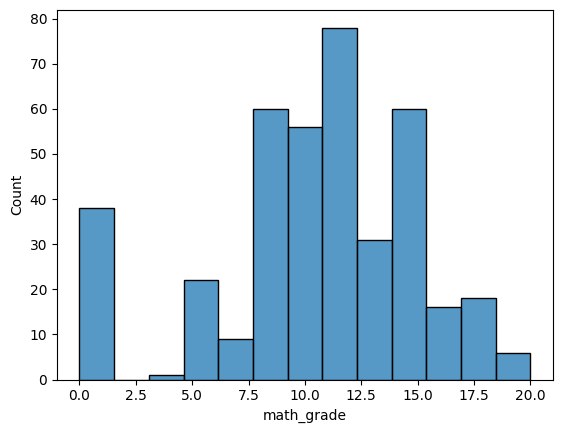

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a histogram of math grades
sns.histplot(x="math_grade", data=df)
plt.show()
plt.clf()

10. Another way to visualize the distribution of a quantitative variable is using a box plot. Use the seaborn boxplot() function to create a boxplot of math_grade.

    Make sure to add this code after the first call to plt.clf() from the above plot and before the second call to plt.show().

    Hint
    The syntax is:

    ```python
    sns.boxplot(x = 'column_name', data = data_name)
    ```


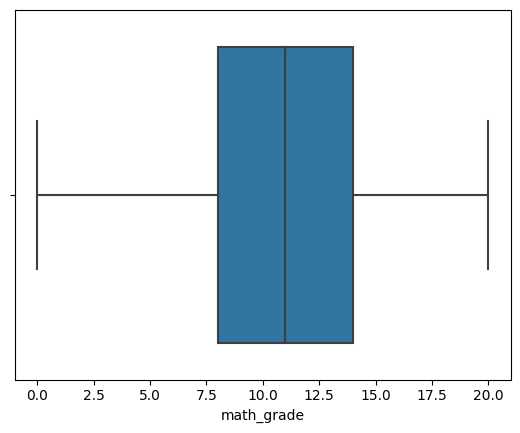

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a box plot of math grades
sns.boxplot(x="math_grade", data=df)
plt.show()
plt.clf()

### Summarize mothers' jobs

11. The Mjob column in the dataset contains information about what the students mothers do as a profession. Summarize the Mjob column by printing the number of students who have mothers with each job type.

    Which value of Mjob is most common?

    Hint
    Use the pandas `.value_counts()` method.


In [22]:
# Calculate number of students with mothers in each job category
print(df.Mjob.value_counts())

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64


12. Now, calculate and print the proportion of students who have mothers with each job type. What proportion of students have mothers who work in health?

Use `.value_counts(normalize = True)` to calculate the proportion of values in each category.


In [23]:
# Calculate proportion of students with mothers in each job category
print(df.Mjob.value_counts(normalize=True))

Mjob
other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: proportion, dtype: float64


### Visualize the distribution of mothers' jobs

13. Now that we've used summary statistics to understand the relative frequencies of different mothers' jobs, let's visualize the same information with a bar chart. Use the seaborn `countplot()` function to create a bar chart of the Mjob variable.

    ```python
    sns.countplot(x = 'column_name', data = data_name)
    ```


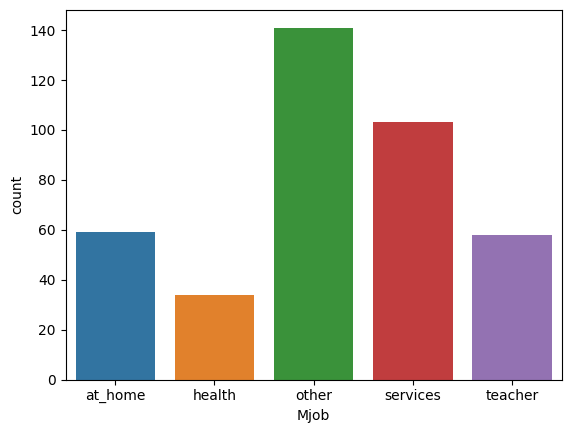

<Figure size 640x480 with 0 Axes>

In [24]:
# Create bar chart of Mjob
sns.countplot(x="Mjob", data=df)
plt.show()
plt.clf()

14. We can also visualize the same information using a pie chart. Create a pie chart of the Mjob column.

    The syntax is:

    ```python
    df.column_name.value_counts().plot.pie()
    ```


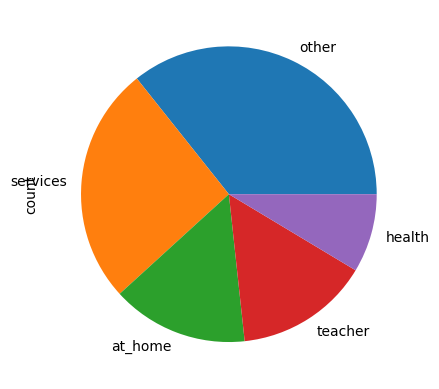

In [25]:
# Create pie chart of Mjob
df.Mjob.value_counts().plot.pie()
plt.show()


### Further exploration

15. Congratulations! You've begun to explore a dataset by calculating summary statistics and creating some basic data visualizations. There are still a few more columns in this dataset that we haven't looked at carefully:

    - `address`: the location of the student's home ('`U`' for urban and '`R`' for rural)
    - `absences`: the number of times the student was absent during the school year
    - `Fjob`: the student's father's job industry

    Now that we've walked you through an exploration of `math_grade` and `Mjob` in more detail, take some time to explore the rest of the columns in the dataset! Which kinds of summary statistics and visualizations can you use to summarize these columns?

    The address and `Fjob` columns are categorical (just like the Mjob column was). Try using `.value_counts()` or creating a bar chart or pie chart.

    The absences column is quantitative. Try calculating central tendency and spread statistics and visualizing the distribution of absences using a histogram or box plot.
